In [140]:
#Setup
!pip install tensorflow numpy matplotlib


In [141]:
#Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [142]:
#Load and Prepare the Dataset
from tensorflow.keras.datasets import cifar10

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [143]:
import cv2
import imghdr

In [144]:
data_dir = '/content/drive/MyDrive/Meta Scifor/Deep Learning CNN Classifire mini project/Happy and sad'

In [145]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [146]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [147]:
# Load Data
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Meta Scifor/Deep Learning CNN Classifire mini project/Happy and sad')

Found 309 files belonging to 2 classes.


In [148]:
data_iterator = data.as_numpy_iterator()

In [149]:
batch = data_iterator.next()

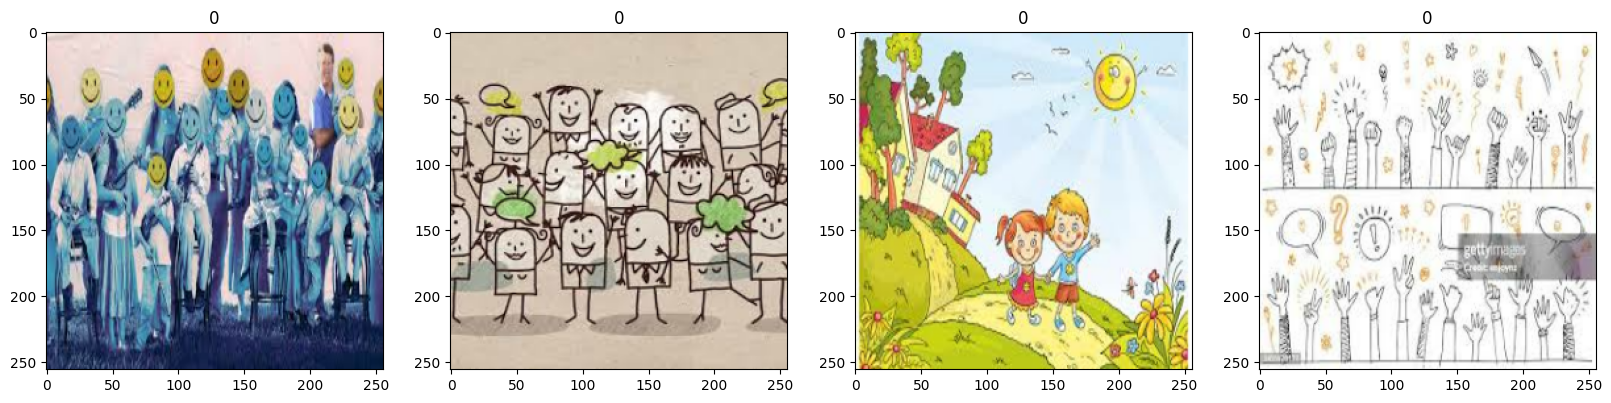

In [151]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [152]:
#Scale Data
data = data.map(lambda x,y: (x/255, y))

In [153]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [154]:
#Split Data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [155]:
train_size

7

In [156]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [157]:
#Build Deep Learning Model
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [159]:
model = Sequential()

In [160]:
# Build the CNN Model
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [161]:
# Compile the Model
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [162]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 30, 30, 16)       

In [163]:
#Train
logdir='logs'

In [164]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [165]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 17s 2s/step - loss: 1.3124 - accuracy: 0.5446 - val_loss: 0.6557 - val_accuracy: 0.7500
Epoch 2/20
7/7 [==============================] - 16s 2s/step - loss: 0.6453 - accuracy: 0.6250 - val_loss: 0.6209 - val_accuracy: 0.6094
Epoch 3/20
7/7 [==============================] - 16s 2s/step - loss: 0.5862 - accuracy: 0.6696 - val_loss: 0.5343 - val_accuracy: 0.7969
Epoch 4/20
7/7 [==============================] - 16s 2s/step - loss: 0.5566 - accuracy: 0.6875 - val_loss: 0.4543 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 15s 2s/step - loss: 0.4858 - accuracy: 0.7500 - val_loss: 0.4638 - val_accuracy: 0.7344
Epoch 6/20
7/7 [==============================] - 15s 2s/step - loss: 0.4387 - accuracy: 0.7812 - val_loss: 0.4223 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 15s 2s/step - loss: 0.4070 - accuracy: 0.8214 - val_loss: 0.2791 - val_accuracy: 0.9219
Epoch 8/20
7/7 [==================

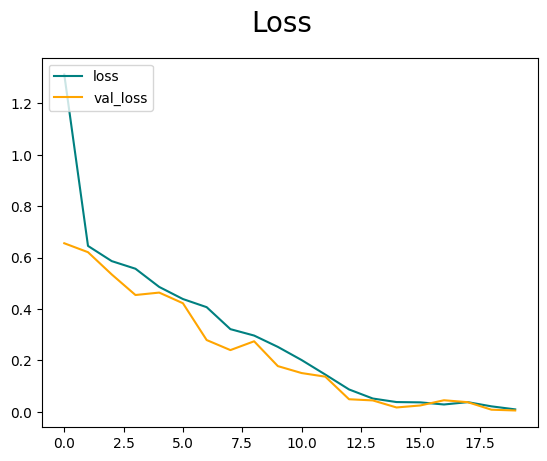

In [166]:
#Plot Performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

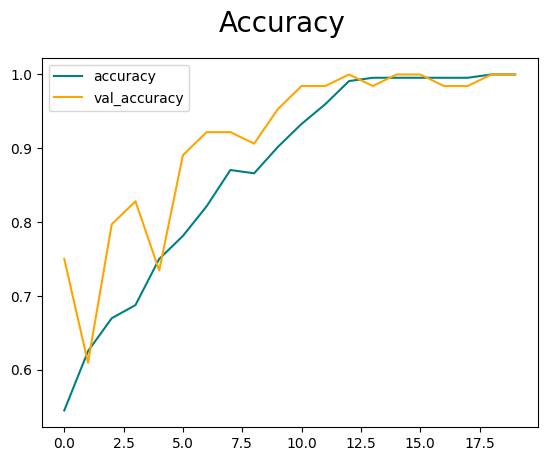

In [167]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [168]:
#Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [169]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [170]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 327ms/step


In [171]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [172]:
#Test
import cv2

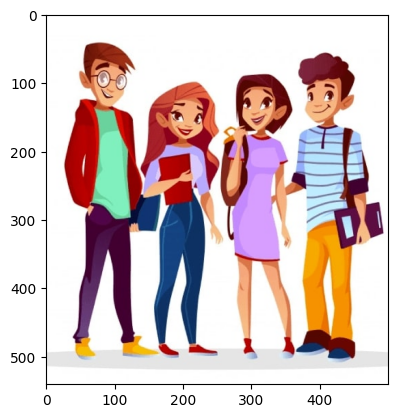

In [173]:
img = cv2.imread('/content/drive/MyDrive/Meta Scifor/Deep Learning CNN Classifire mini project/Happt test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

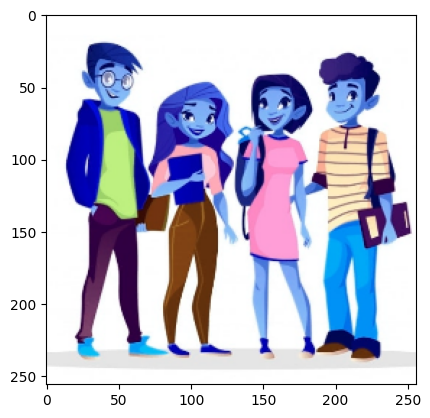

In [174]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [175]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 33ms/step


In [176]:
yhat

array([[0.00467635]], dtype=float32)

In [177]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


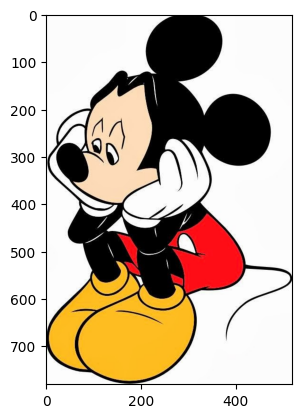

In [178]:
img = cv2.imread('/content/drive/MyDrive/Meta Scifor/Deep Learning CNN Classifire mini project/Sad test..jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

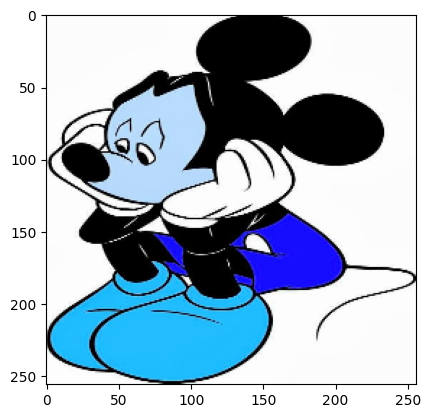

In [179]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [180]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 51ms/step


In [181]:
yhat

array([[0.99842685]], dtype=float32)

In [182]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [183]:
#Save the Model
from tensorflow.keras.models import load_model

In [184]:
import os
model.save(os.path.join('Deep Learning CNN Classifire mini project','imageclassifier.h5'))

In [185]:
new_model = load_model(os.path.join('Deep Learning CNN Classifire mini project','imageclassifier.h5'))

In [186]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 108ms/step


array([[0.99842685]], dtype=float32)